# Linear Regrssion on US Housing Price

## Linear regression primer

In statistics, linear regression is a linear approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

Linear regression models are often fitted using the least squares approach, but they may also be fitted in other ways, such as by minimizing the "lack of fit" in some other norm (as with least absolute deviations regression), or by minimizing a penalized version of the least squares loss function as in ridge regression ($L_2$-norm penalty) and lasso ($L_1$-norm penalty). Conversely, the least squares approach can be used to fit models that are not linear models. Thus, although the terms "least squares" and "linear model" are closely linked, they are not synonymous.

### Import packages and dataset

In [36]:
import numpy as np 
import pandas as pd
from math import sqrt
from scipy.stats import skew
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [37]:
df=pd.read_csv(r"C:\Users\20115\Downloads\USA_Housing.csv")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


### Check basic info on the data set

**'info()' method to check the data types and number**

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**'describe()' method to get the statistical summary of the various features of the data set**

In [42]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


**'columns' method to get the names of the columns (features)**

In [44]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

### Basic plotting and visualization on the data set

**Pairplots using seaborn**

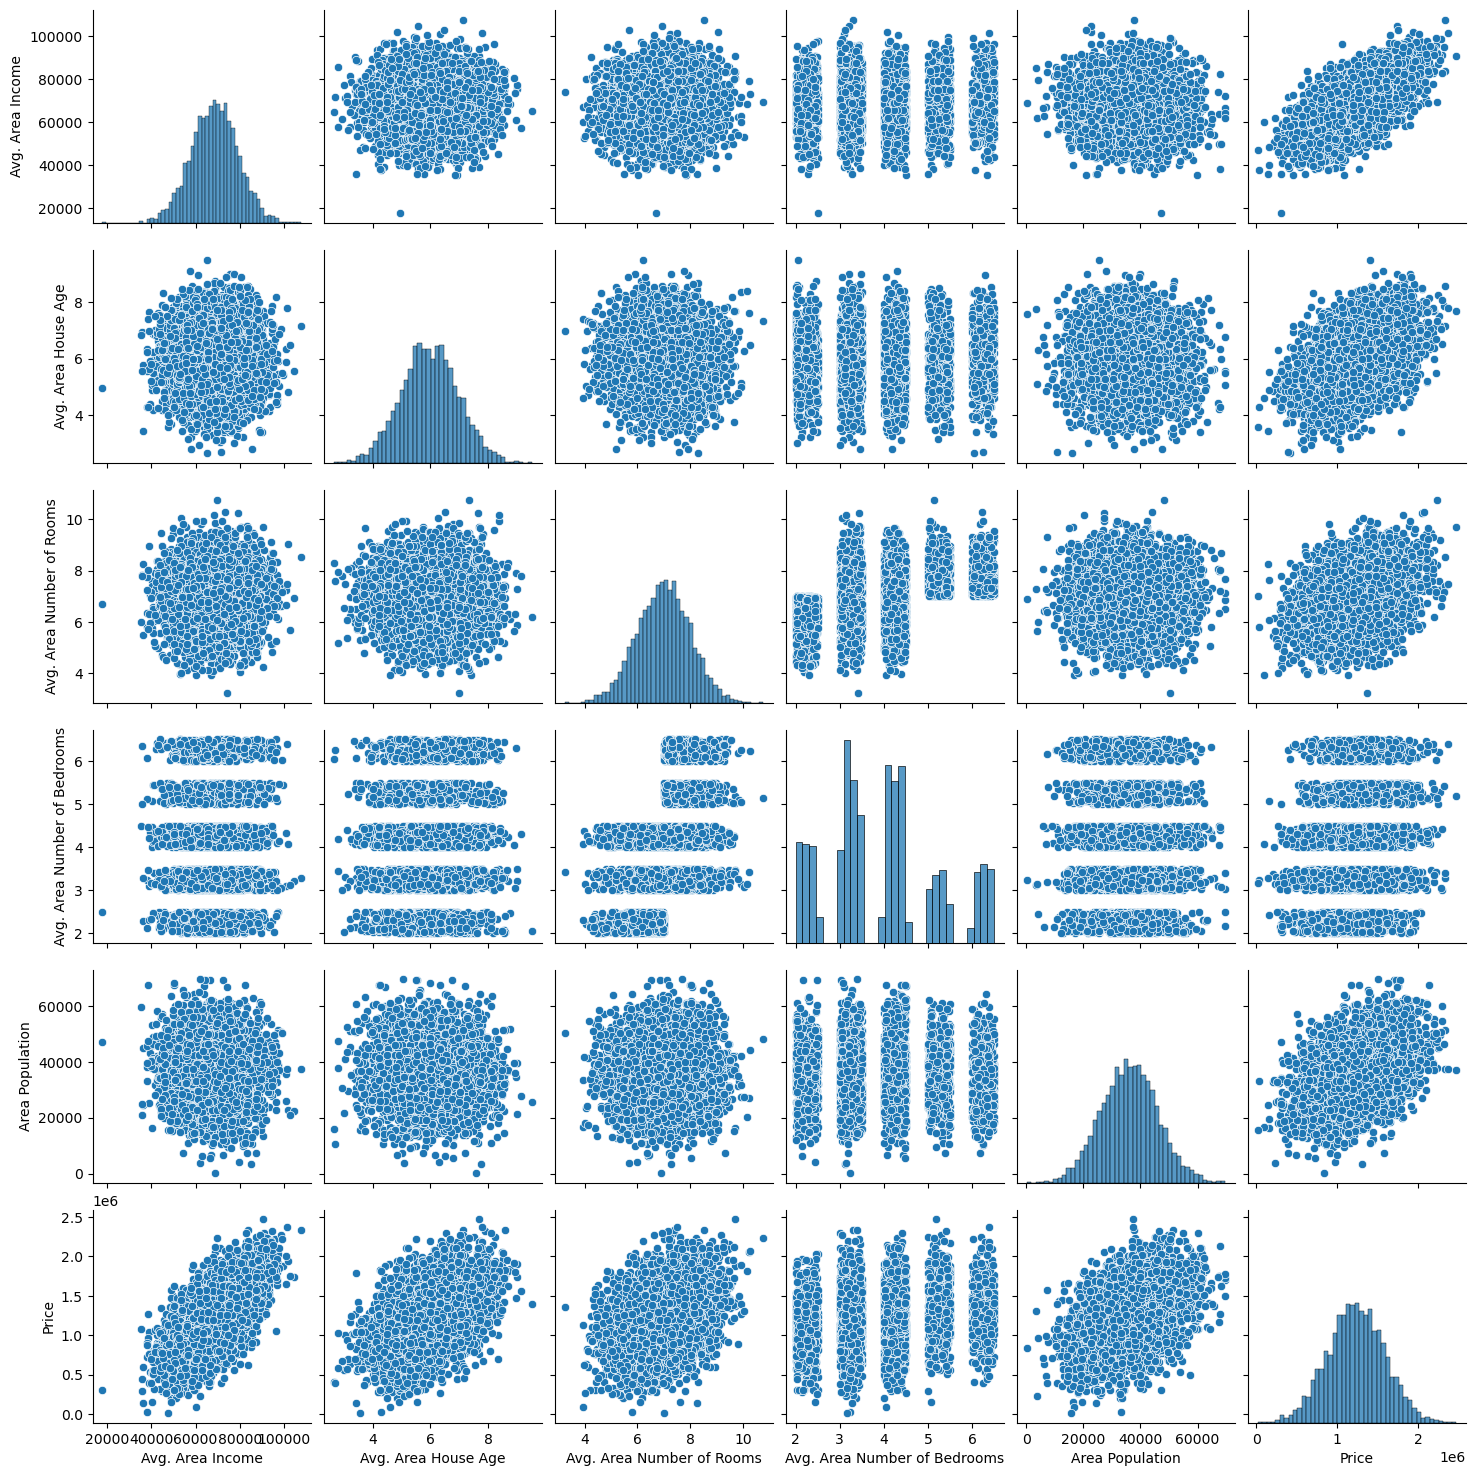

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

**Distribution of price (the predicted quantity)**

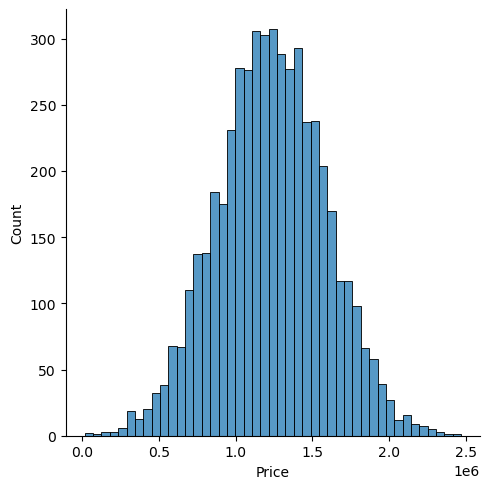

In [49]:
sns.displot(df['Price'])
plt.show()

<Axes: ylabel='Frequency'>

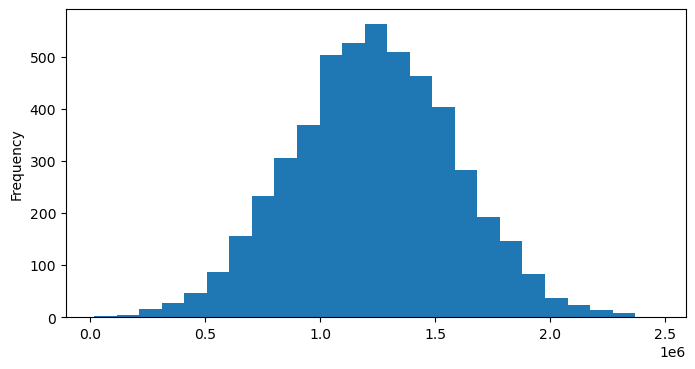

In [50]:
df['Price'].plot.hist(bins=25,figsize=(8,4))

<Axes: ylabel='Density'>

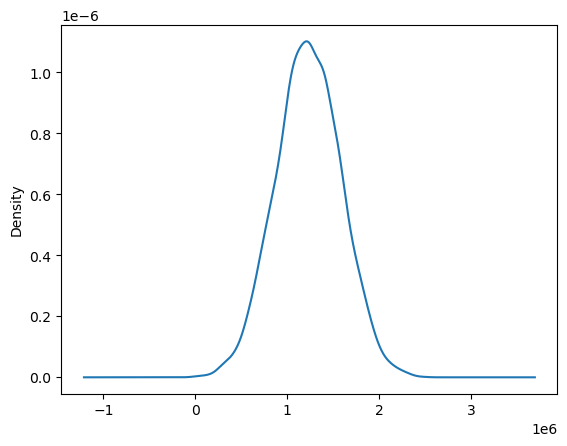

In [51]:
df['Price'].plot.density()

**Correlation matrix and heatmap**

In [53]:
numeric_cols = df.select_dtypes(include = [np.number])
corr = numeric_cols.corr()
print ('The Most Correlated Features with Price:'), print (corr['Price'].sort_values(ascending = False)[:10], '\n')
print ('The Most Uncorrelated Features with Price:'), print (corr['Price'].sort_values(ascending = False)[-5:])

The Most Correlated Features with Price:
Price                           1.000000
Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Area Population                 0.408556
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.171071
Name: Price, dtype: float64 

The Most Uncorrelated Features with Price:
Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Area Population                 0.408556
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.171071
Name: Price, dtype: float64


(None, None)

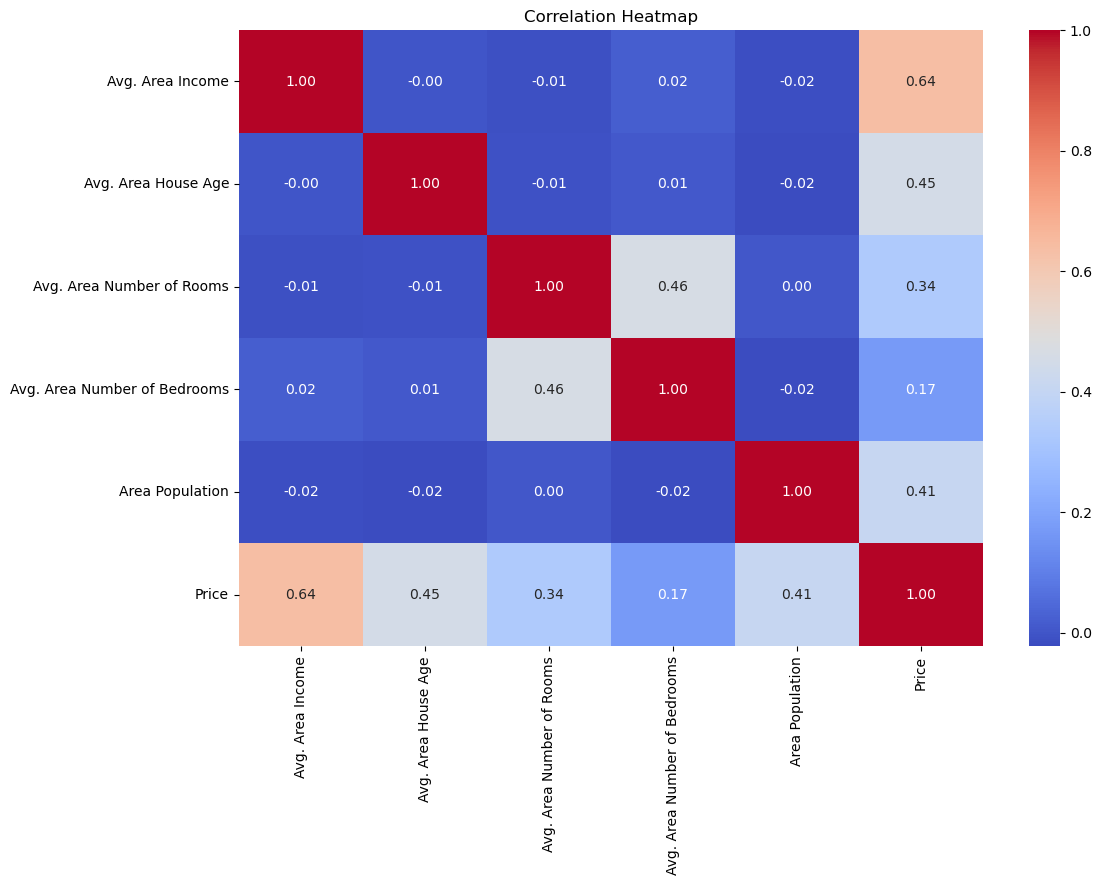

In [54]:

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Feature and variable sets

**Make a list of data frame column names**

In [57]:
column_names = df.columns.tolist()
print(column_names)


['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address']


**Put all the numerical features in X and Price in y, ignore Address which is string for linear regression**

In [59]:
x=df.drop(columns=['Price','Address'])
y = df['Price']

x

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


### Test-train split

**Create X and y train and test splits in one command using a split ratio and a random seed**

In [62]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

**Check the size and shape of train/test splits (it should be in the ratio as per test_size parameter above)**

In [64]:
# Check the size and shape of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4000, 5)
X_test shape: (1000, 5)
y_train shape: (4000,)
y_test shape: (1000,)


### Model fit and training

**Import linear regression model estimator from scikit-learn and instantiate**

In [67]:
lr = linear_model.LinearRegression()

**Fit the model on to the instantiated object itself**

In [76]:
model = lr.fit(X_train, y_train)

**Check the intercept and coefficients and put them in a DataFrame**

In [88]:
print("The intercept term of the linear model:", lr.intercept_)

The intercept term of the linear model: -2635072.900932409


In [80]:
print("The coefficients of the linear model:", lr.coef_)

The coefficients of the linear model: [2.16522058e+01 1.64666481e+05 1.19624012e+05 2.44037761e+03
 1.52703134e+01]


In [84]:

cdf = pd.DataFrame(data=lr.coef_, index=X_train.columns, columns=["Coefficients"])

cdf

,Coefficients
Avg. Area Income,21.652206
Avg. Area House Age,164666.480722
Avg. Area Number of Rooms,119624.012232
Avg. Area Number of Bedrooms,2440.377611
Area Population,15.270313


### Calculation of standard errors and t-statistic for the coefficients

In [110]:

n = X_train.shape[0]
k = X_train.shape[1]
dfN = n - k

# Predicting and calculating errors
train_pred = lr.predict(X_train)
train_error = np.square(train_pred - y_train)
sum_error = np.sum(train_error)

# Calculating standard errors
se = np.zeros(k)
for i in range(k):
    r = sum_error / dfN
    r = r / np.sum(np.square(X_train.iloc[:, i] - X_train.iloc[:, i].mean()))
    se[i] = np.sqrt(r)

# Assuming cdf is a DataFrame with a 'Coefficients' column
cdf['Standard Error'] = se
cdf['t-statistic'] = cdf['Coefficients'] / cdf['Standard Error']

print(cdf)


                               Coefficients  Standard Error  t-statistic
Avg. Area Income                  21.652206        0.149705   144.632920
Avg. Area House Age           164666.480722     1612.910628   102.092750
Avg. Area Number of Rooms     119624.012232     1587.666709    75.345796
Avg. Area Number of Bedrooms    2440.377611     1306.675115     1.867624
Area Population                   15.270313        0.160719    95.012274


In [108]:

print(lr.predict(X_test)[1])
print(y_test)

1237037.2294941465
1501    1.339096e+06
2586    1.251794e+06
2653    1.340095e+06
1055    1.431508e+06
705     1.042374e+06
            ...     
4711    1.107031e+06
2313    1.405505e+06
3214    1.924156e+06
2732    1.571254e+06
1926    8.831475e+05
Name: Price, Length: 1000, dtype: float64


In [112]:
print("Therefore, features arranged in the order of importance for predicting the house price\n",'-'*90,sep='')
l=list(cdf.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))

Therefore, features arranged in the order of importance for predicting the house price
------------------------------------------------------------------------------------------
Avg. Area Income > 
Avg. Area House Age > 
Area Population > 
Avg. Area Number of Rooms > 
Avg. Area Number of Bedrooms


In [114]:
from sklearn.metrics import r2_score

In [116]:
train_pred=lr.predict(X_train)
print(r2_score(y_train,train_pred))

0.9179787435623722


In [118]:
predictions = lr.predict(X_test)
print(r2_score(y_test,predictions))

0.917997170683442


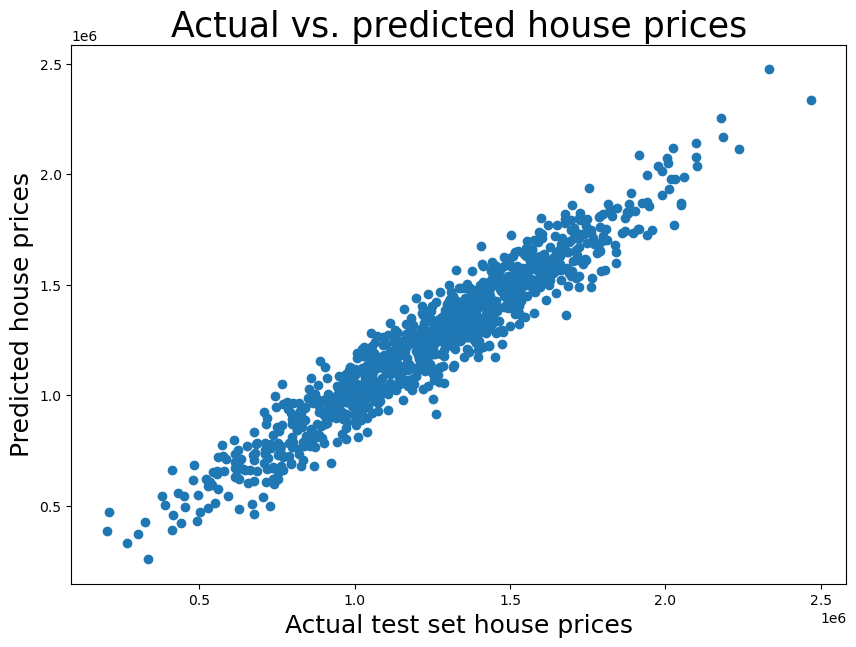

In [120]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted house prices",fontsize=25)
plt.xlabel("Actual test set house prices",fontsize=18)
plt.ylabel("Predicted house prices", fontsize=18)
plt.scatter(x=y_test,y=predictions)

In [124]:
from sklearn import metrics
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

R-squared value of predictions: 0.918


Text(0.5, 1.0, 'Area Population vs. Price')

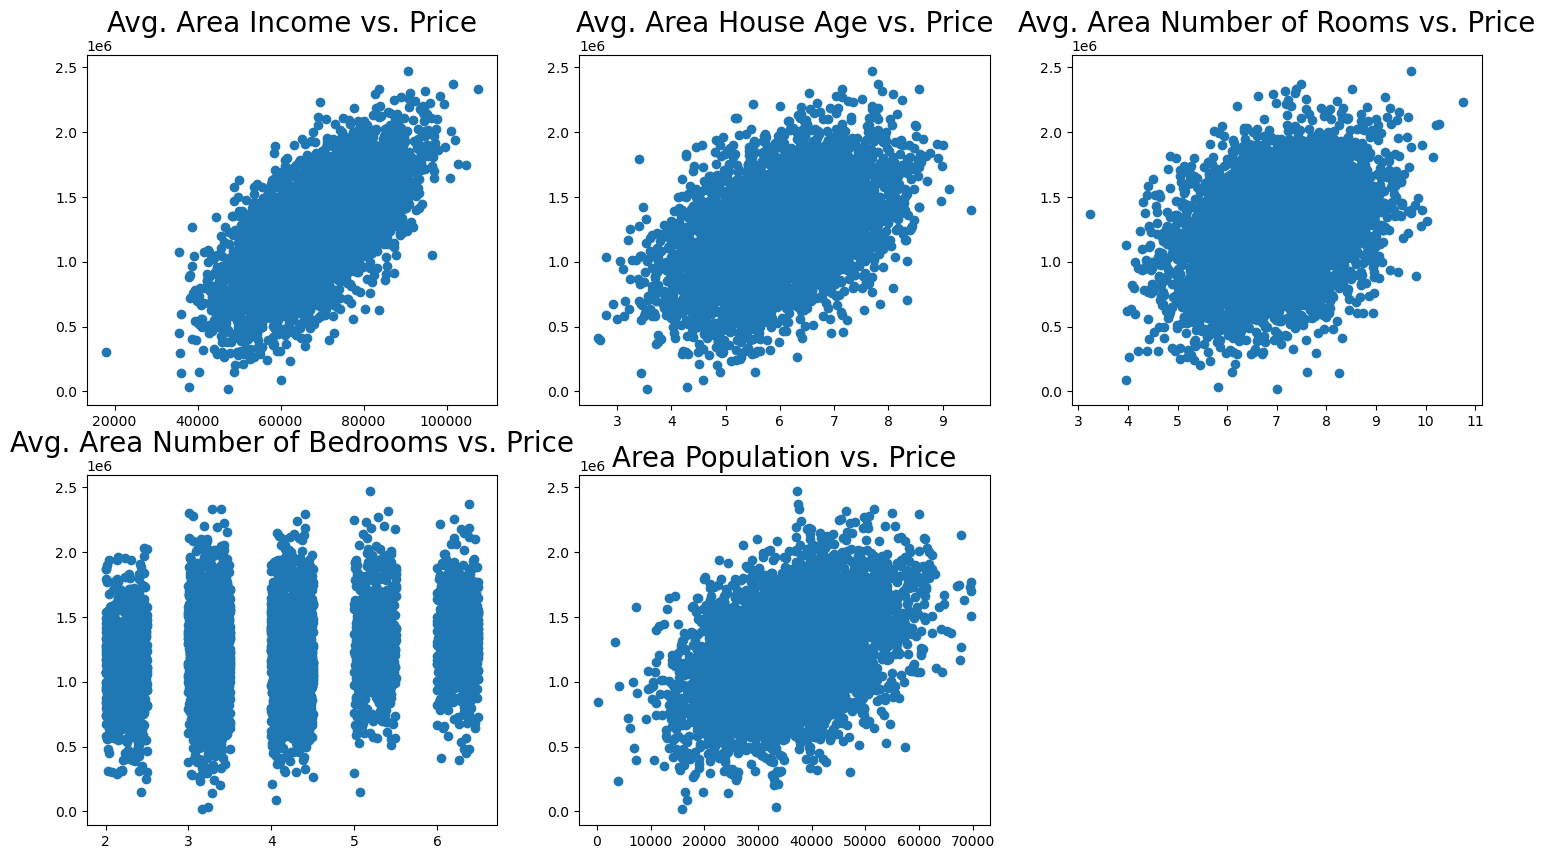

In [126]:
l=list(cdf.index)
from matplotlib import gridspec
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2,3)
#f, ax = plt.subplots(nrows=1,ncols=len(l), sharey=True)
ax0 = plt.subplot(gs[0])
ax0.scatter(df[l[0]],df['Price'])
ax0.set_title(l[0]+" vs. Price", fontdict={'fontsize':20})

ax1 = plt.subplot(gs[1])
ax1.scatter(df[l[1]],df['Price'])
ax1.set_title(l[1]+" vs. Price",fontdict={'fontsize':20})

ax2 = plt.subplot(gs[2])
ax2.scatter(df[l[2]],df['Price'])
ax2.set_title(l[2]+" vs. Price",fontdict={'fontsize':20})

ax3 = plt.subplot(gs[3])
ax3.scatter(df[l[3]],df['Price'])
ax3.set_title(l[3]+" vs. Price",fontdict={'fontsize':20})

ax4 = plt.subplot(gs[4])
ax4.scatter(df[l[4]],df['Price'])
ax4.set_title(l[4]+" vs. Price",fontdict={'fontsize':20})

**R-square of the model fit**

In [128]:
print("R-squared value of this fit:",round(metrics.r2_score(y_train,train_pred),3))

R-squared value of this fit: 0.918


### Prediction, error estimate, and regression evaluation matrices

**Prediction using the lm model**

In [130]:
predictions = lr.predict(X_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (1000,)


**Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line**

Text(0.5, 1.0, 'Linear Regression Model')

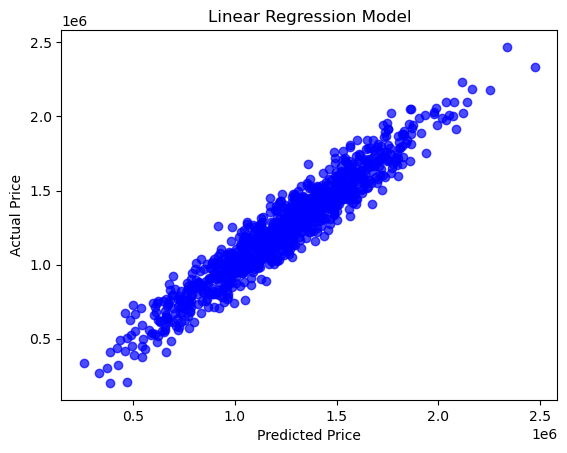

In [132]:
# alpha helps to show overlapping data
plt.scatter(predictions, y_test, alpha = 0.7, color = 'b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')

**Plotting histogram of the residuals i.e. predicted errors (expect a normally distributed pattern)**

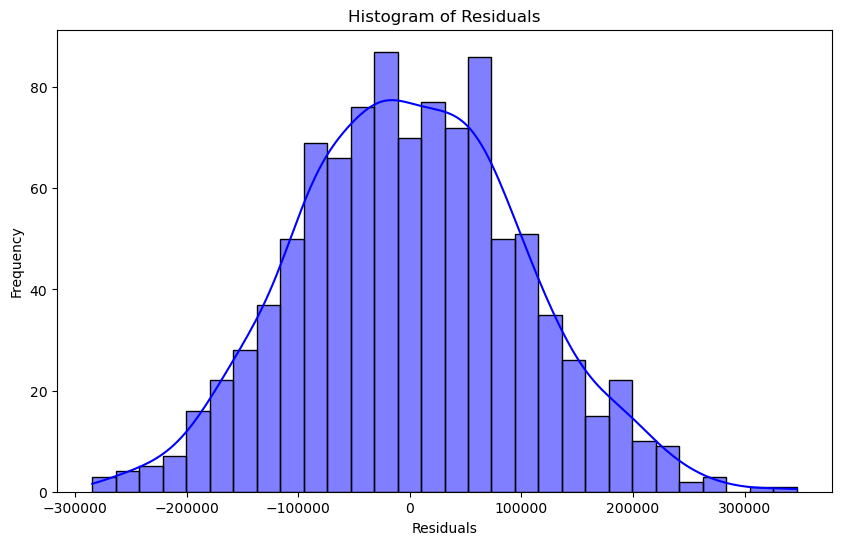

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - predictions

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


**Scatter plot of residuals and predicted values (Homoscedasticity)**

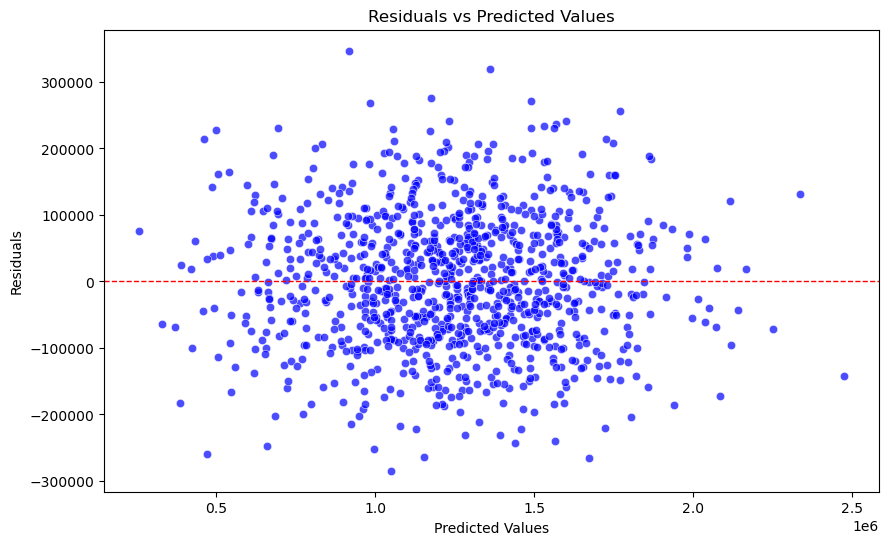

In [136]:

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - predictions

# Scatter plot of residuals vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals, color='blue', edgecolor='w', alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


**Regression evaluation metrices**

In [138]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate MAE, MSE, RMSE, and R²
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 80879.09723488614
Mean Squared Error (MSE): 10089009300.892897
Root Mean Squared Error (RMSE): 100444.06055557937
R-squared (R²): 0.917997170683442


**R-square value**

In [140]:
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

R-squared value of predictions: 0.918
